In [15]:
import pandas as pd
import random
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

# Load the uploaded df
df = pd.read_csv('IMDB dataset.csv')

# Assign random genres
genres = ['Drama', 'Comedy', 'Action', 'Horror', 'Romance', 'Thriller', 'Sci-Fi', 'Documentary']
df['genre'] = df['review'].apply(lambda _: ', '.join(random.sample(genres, k=random.choice([1, 2]))))
df['genre'] = df['genre'].str.split(', ')


# Display the first few rows and column info
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
 2   genre      50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


(                                              review sentiment  \
 0  One of the other reviewers has mentioned that ...  positive   
 1  A wonderful little production. <br /><br />The...  positive   
 2  I thought this was a wonderful way to spend ti...  positive   
 3  Basically there's a family where a little boy ...  negative   
 4  Petter Mattei's "Love in the Time of Money" is...  positive   
 
                      genre  
 0    [Sci-Fi, Documentary]  
 1  [Documentary, Thriller]  
 2       [Action, Thriller]  
 3                 [Action]  
 4                 [Sci-Fi]  ,
 None)

In [2]:
import re
def clean_text(text):
    text = text.lower()  # set lower case
    text = re.sub(r"<.*?>", "", text)  # remove HTML
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation marks
    text = re.sub(r"\d+", "", text)  # remove numbers
    text = text.strip()  # remove extra spaces
    return text

In [3]:
df['review'] = df['review'].apply(clean_text)

In [4]:
df['review'][1]

'a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

In [5]:
X = df['review']
y = df['sentiment']

print(f"df length: {len(df)}: \n {df.columns} \n")
print(f"X 'review' length: {len(X)}: \n {X} \n")
print(f"y 'sentiment' length: {len(y)}: \n {y}")

df length: 50000: 
 Index(['review', 'sentiment'], dtype='object') 

X 'review' length: 50000: 
 0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object 

y 'sentiment' length: 50000: 
 0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negativ

In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already present
nltk.download("vader_lexicon")

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Apply VADER compound score
df['vader_compound'] = df['review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_sentiment'] = df['vader_compound'].apply(classify_sentiment)

# Show a sample
df[['review', 'sentiment', 'vader_compound', 'vader_sentiment']].head(10)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anjalitiwari/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review,sentiment,vader_compound,vader_sentiment
0,one of the other reviewers has mentioned that ...,positive,-0.9947,Negative
1,a wonderful little production the filming tech...,positive,0.9693,Positive
2,i thought this was a wonderful way to spend ti...,positive,0.9712,Positive
3,basically theres a family where a little boy j...,negative,-0.9117,Negative
4,petter matteis love in the time of money is a ...,positive,0.9744,Positive
5,probably my alltime favorite movie a story of ...,positive,0.9828,Positive
6,i sure would like to see a resurrection of a u...,positive,0.9246,Positive
7,this show was an amazing fresh innovative ide...,negative,0.8596,Positive
8,encouraged by the positive comments about this...,negative,0.2362,Positive
9,if you like original gut wrenching laughter yo...,positive,0.8979,Positive


In [7]:
pd.crosstab(df['sentiment'], df['vader_sentiment'])

vader_sentiment,Negative,Neutral,Positive
sentiment,,,
negative,13285,375,11340
positive,3635,167,21198


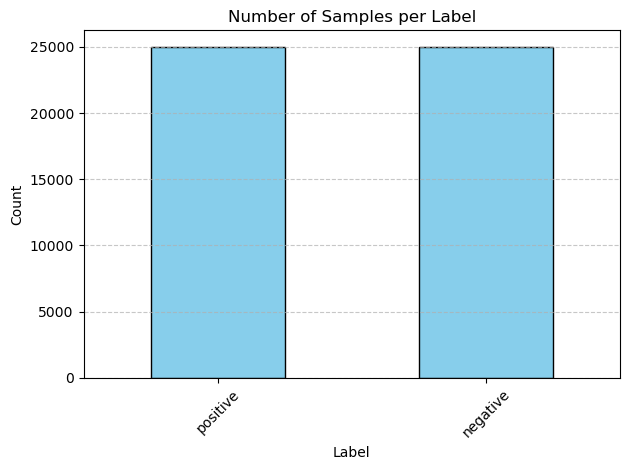

In [8]:
import matplotlib.pyplot as plt

# Count the number of samples in each label
label_counts = df['sentiment'].value_counts()

# Plot a column diagram (bar chart)
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Samples per Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

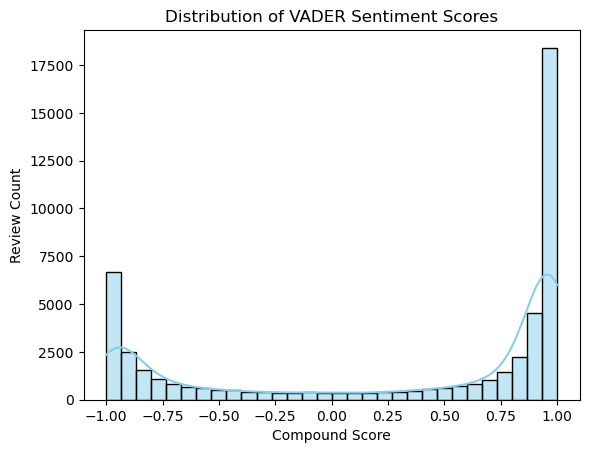

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['vader_compound'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of VADER Sentiment Scores")
plt.xlabel("Compound Score")
plt.ylabel("Review Count")
plt.show()

In [10]:
import numpy as np

# Simulate a box office success score (0–100) based on sentiment
df['success_score'] = df['vader_compound'].apply(lambda x: np.clip((x + 1) * 50, 0, 100))

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['vader_compound']]
y = df['success_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=False)
print("RMSE:", rmse)


RMSE: 6.857248921296895e-14


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anjalitiwari/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


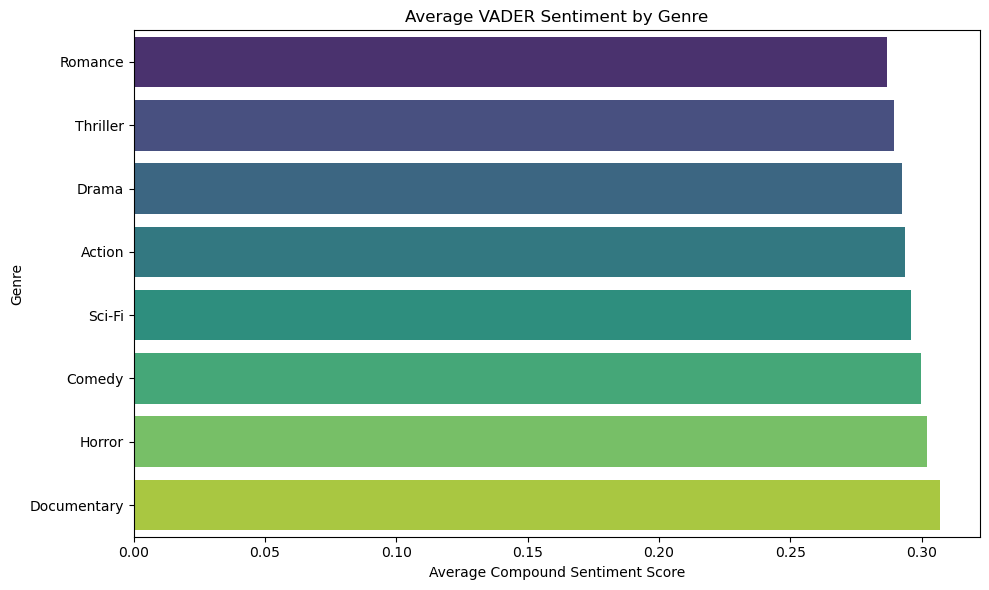

In [16]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df['vader_compound'] = df['review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Analyze sentiment by genre
genre_sentiment = df.explode('genre').groupby('genre')['vader_compound'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sentiment.values, y=genre_sentiment.index, palette="viridis")
plt.title("Average VADER Sentiment by Genre")
plt.xlabel("Average Compound Sentiment Score")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()